# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units={units}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east ballina
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | hadibu
Processing Record 4 of Set 1 | itapirapua
Processing Record 5 of Set 1 | smithers
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | barra do corda
Processing Record 8 of Set 1 | cannonvale
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | danilov
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | brak
Processing Record 15 of Set 1 | selma
Processing Record 16 of Set 1 | undurkhaan
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | zaragoza
Processing Record 19 of Set 1 | emerald
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | stanley
Processing Record 22 of Set 1 | pavlodar
Processing Reco

Processing Record 37 of Set 4 | pacific grove
Processing Record 38 of Set 4 | zaozersk
Processing Record 39 of Set 4 | benjamin constant
Processing Record 40 of Set 4 | kourou
Processing Record 41 of Set 4 | ceres
Processing Record 42 of Set 4 | bandiagara
Processing Record 43 of Set 4 | caxias
Processing Record 44 of Set 4 | pachino
Processing Record 45 of Set 4 | namibe
Processing Record 46 of Set 4 | uturoa
Processing Record 47 of Set 4 | st. john's
Processing Record 48 of Set 4 | tofol
Processing Record 49 of Set 4 | arraial do cabo
Processing Record 0 of Set 5 | itoman
Processing Record 1 of Set 5 | hampton bays
Processing Record 2 of Set 5 | charters towers
Processing Record 3 of Set 5 | al kharijah
Processing Record 4 of Set 5 | suva
Processing Record 5 of Set 5 | itamaraca
Processing Record 6 of Set 5 | ar rutbah
Processing Record 7 of Set 5 | trevelin
Processing Record 8 of Set 5 | kone
Processing Record 9 of Set 5 | revda
Processing Record 10 of Set 5 | revelstoke
Processing 

Processing Record 30 of Set 8 | ouani
Processing Record 31 of Set 8 | castillos
Processing Record 32 of Set 8 | kruisfontein
Processing Record 33 of Set 8 | alaghsas
Processing Record 34 of Set 8 | santa terezinha
Processing Record 35 of Set 8 | ariquemes
Processing Record 36 of Set 8 | nar'yan-mar
Processing Record 37 of Set 8 | haiku-pauwela
Processing Record 38 of Set 8 | faya-largeau
Processing Record 39 of Set 8 | san antonio del estrecho
City not found. Skipping...
Processing Record 40 of Set 8 | quillacollo
Processing Record 41 of Set 8 | jose mariano jimenez
City not found. Skipping...
Processing Record 42 of Set 8 | bardai
Processing Record 43 of Set 8 | mayen abun
City not found. Skipping...
Processing Record 44 of Set 8 | bage
Processing Record 45 of Set 8 | taltal
Processing Record 46 of Set 8 | labytnangi
Processing Record 47 of Set 8 | kegen
Processing Record 48 of Set 8 | afaahiti
Processing Record 49 of Set 8 | wagar
Processing Record 0 of Set 9 | deir ez-zor
Processing

Processing Record 20 of Set 12 | great falls
Processing Record 21 of Set 12 | tadine
Processing Record 22 of Set 12 | olovyannaya
Processing Record 23 of Set 12 | howard springs
Processing Record 24 of Set 12 | saldanha
Processing Record 25 of Set 12 | marine corps base hawaii - mcbh
Processing Record 26 of Set 12 | kavaratti
Processing Record 27 of Set 12 | lazaro cardenas
Processing Record 28 of Set 12 | port alberni
Processing Record 29 of Set 12 | vidyayevo
Processing Record 30 of Set 12 | toliara
Processing Record 31 of Set 12 | pingliang
Processing Record 32 of Set 12 | portland
Processing Record 33 of Set 12 | fayroz koh
Processing Record 34 of Set 12 | strathmore
Processing Record 35 of Set 12 | nykobing falster
Processing Record 36 of Set 12 | letterkenny
Processing Record 37 of Set 12 | ribas do rio pardo
Processing Record 38 of Set 12 | noumea
Processing Record 39 of Set 12 | mandan
Processing Record 40 of Set 12 | anaconda
Processing Record 41 of Set 12 | maues
Processing R

In [4]:
city_weather

{'coord': {'lon': 14.7644, 'lat': -4.3614},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 74.98,
  'feels_like': 75.15,
  'temp_min': 74.98,
  'temp_max': 74.98,
  'pressure': 1013,
  'humidity': 63,
  'sea_level': 1013,
  'grnd_level': 963},
 'visibility': 10000,
 'wind': {'speed': 3.96, 'deg': 260, 'gust': 7.9},
 'clouds': {'all': 38},
 'dt': 1691705221,
 'sys': {'country': 'CG', 'sunrise': 1691644072, 'sunset': 1691687099},
 'timezone': 3600,
 'id': 2258984,
 'name': 'Kinkala',
 'cod': 200}

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east ballina,-28.8667,153.5833,63.81,60,0,8.48,AU,1691705136
1,grytviken,-54.2811,-36.5092,30.09,98,96,8.70,GS,1691705136
2,hadibu,12.6500,54.0333,77.94,82,45,15.17,YE,1691705136
3,itapirapua,-15.8233,-50.6133,86.63,25,15,4.18,BR,1691705136
4,smithers,54.7804,-127.1743,66.52,48,75,3.44,CA,1691705136


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east ballina,-28.8667,153.5833,63.81,60,0,8.48,AU,1691705136
1,grytviken,-54.2811,-36.5092,30.09,98,96,8.70,GS,1691705136
2,hadibu,12.6500,54.0333,77.94,82,45,15.17,YE,1691705136
3,itapirapua,-15.8233,-50.6133,86.63,25,15,4.18,BR,1691705136
4,smithers,54.7804,-127.1743,66.52,48,75,3.44,CA,1691705136


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

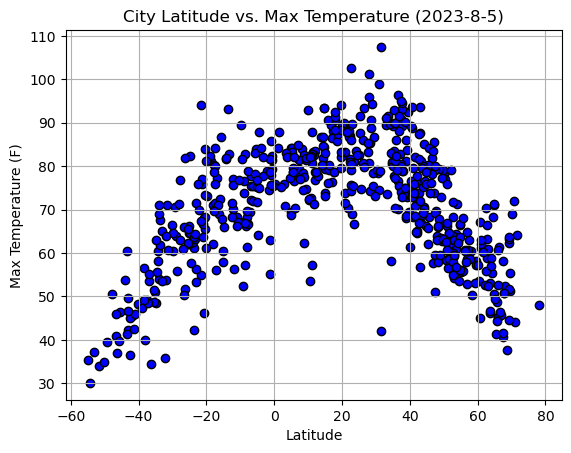

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "blue", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (2023-8-5)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

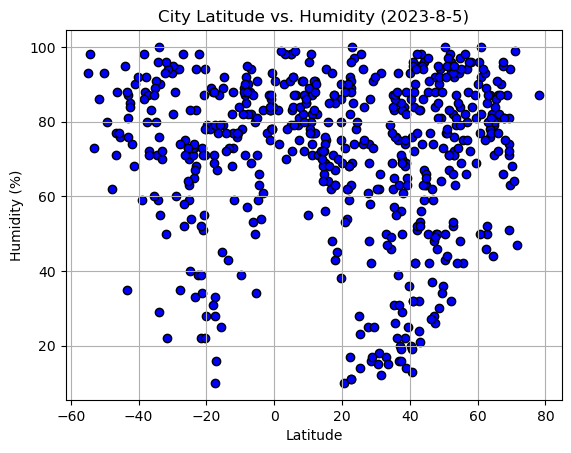

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "blue", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (2023-8-5)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

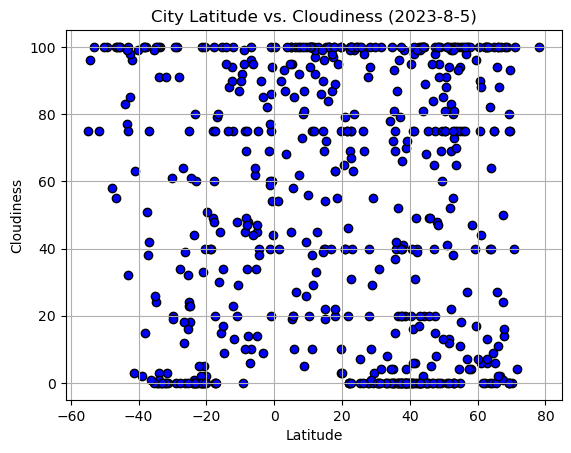

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "blue", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (2023-8-5)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

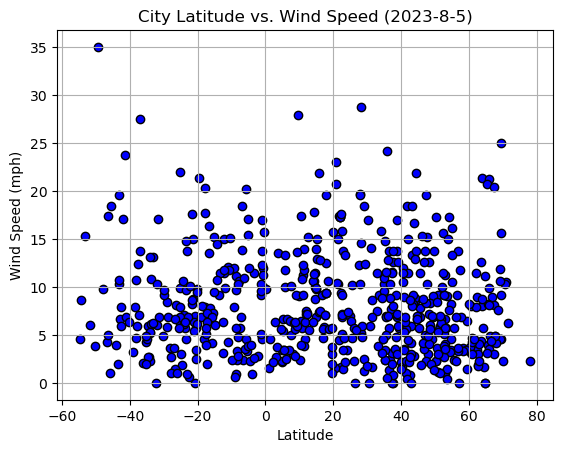

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "blue", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (2023-8-5)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df ["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hadibu,12.6500,54.0333,77.94,82,45,15.17,YE,1691705136
4,smithers,54.7804,-127.1743,66.52,48,75,3.44,CA,1691705136
9,danilov,58.1908,40.1717,60.53,96,4,3.69,RU,1691705137
10,isafjordur,66.0755,-23.1240,45.27,81,100,9.95,IS,1691705137
13,brak,27.5496,14.2714,83.16,25,0,12.35,LY,1691705137


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east ballina,-28.8667,153.5833,63.81,60,0,8.48,AU,1691705136
1,grytviken,-54.2811,-36.5092,30.09,98,96,8.70,GS,1691705136
3,itapirapua,-15.8233,-50.6133,86.63,25,15,4.18,BR,1691705136
5,puerto natales,-51.7236,-72.4875,33.94,86,75,6.08,CL,1691705136
6,barra do corda,-5.5000,-45.2500,83.88,34,34,3.31,BR,1691704918


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6693008752591774


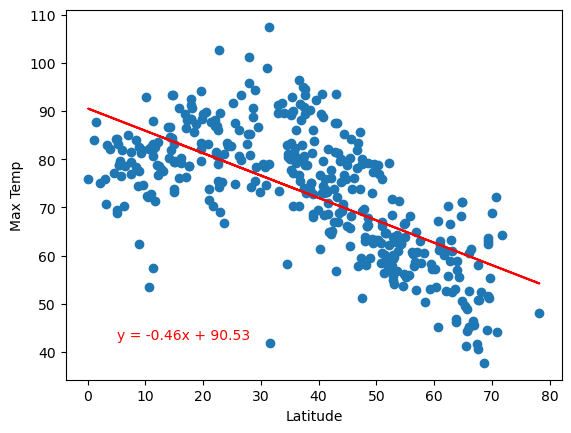

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), color = 'red')
print(f"The r-value is: {rvalue}")

plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.7644099156356384


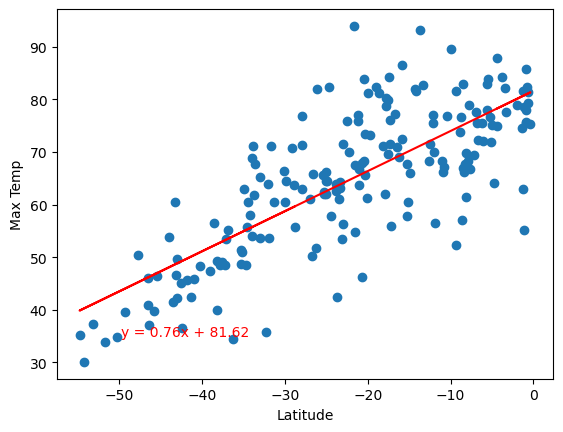

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), color = 'red')
print(f"The r-value is: {rvalue}")

plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.005810289142425049


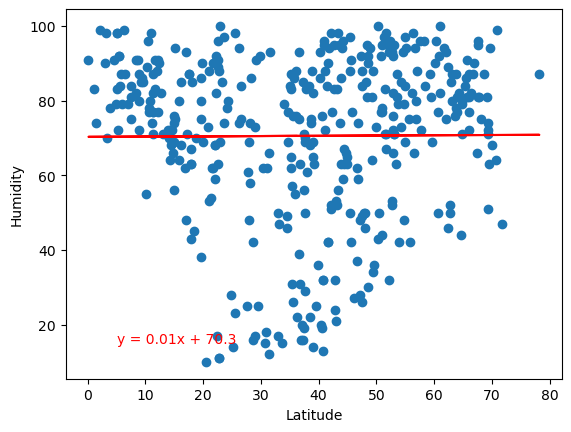

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), color = 'red')
print(f"The r-value is: {rvalue}")

plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: -0.07732571465334491


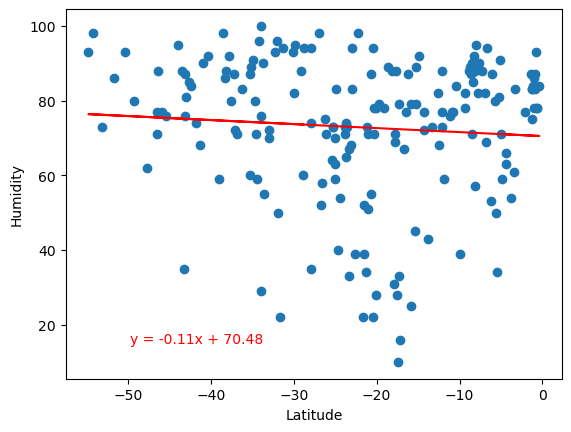

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), color = 'red')
print(f"The r-value is: {rvalue}")

plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.13455956775678732


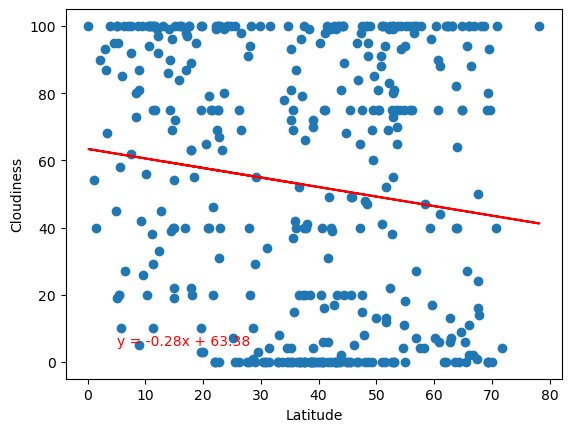

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), color = 'red')
print(f"The r-value is: {rvalue}")

plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: -0.06580053507431262


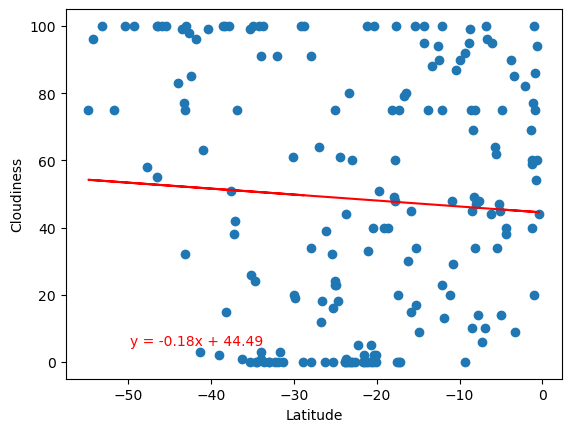

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), color = 'red')
print(f"The r-value is: {rvalue}")

plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0944296029348198


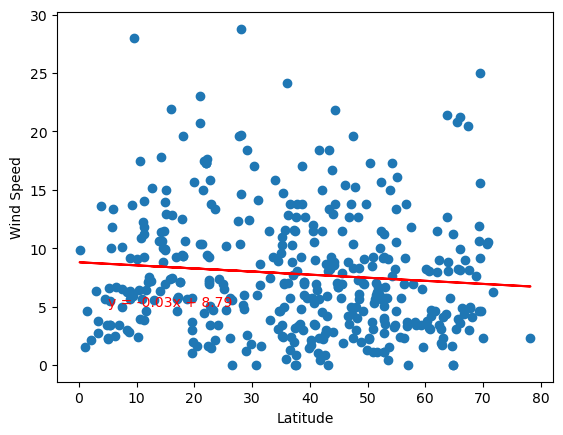

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), color = 'red')
print(f"The r-value is: {rvalue}")

plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.0944296029348198


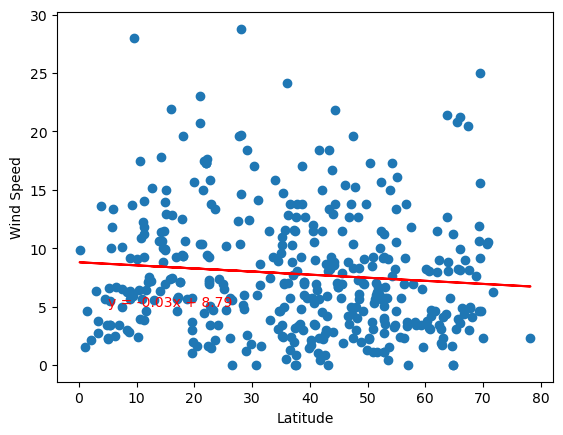

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), color = 'red')
print(f"The r-value is: {rvalue}")

plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE